In [38]:
from PRBM import PE_l, PE1_l, PE2_l, PE3_l, F_l, dF_l, find_roots
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

import scipy.optimize as opt
import numpy as np

#define function to fine all roots of  a function in a given range
#sample n initial guesses between a and b
def find_roots(f,a,b,n=100,df = None):
    #sample n initial guesses between a and b
    x0 = np.linspace(a,b,n)
    #find roots
    roots = set()
    for x in x0:
        try:
            r = opt.newton(f,x,fprime=df)
    
            roots.add(r.round(5))

        except:
            pass

    return roots

In [52]:

# fix h1 at 0.5
h1 = 0.5
def h2_ideal(l1, h1): return np.sqrt(l1**2+h1**2)-l1
k_theta = 0
k_phi = 0
k_L = 6000
l1 = 1.4
l2 = 0.4

In [138]:
# find max theta

def max_angle(l1, l2, h1, h2, alpha):
    max_theta = 2*np.arctan(h1/l1)
    h2_star = h2_ideal(l1, h1)

    max_phi = np.arctan(h2/l2)+ np.arctan((2*h2_star-h2)/l2)
    max_angle = max(max_theta, max_phi)

    return max_angle

In [141]:
rootmeshes = {}

In [148]:
l1s = np.linspace(1, 3, 50)
l2s = np.linspace(0.1, 0.8, 50)
rootsmesh = np.zeros((len(l1s), len(l2s)))
maxangmesh = np.zeros((len(l1s), len(l2s)))
alpha = 1.2

for i, l1 in enumerate(l1s):
    for j,l2 in enumerate(l2s):
        #define function to find roots
        h2 = alpha*h2_ideal(l1, h1)
        
        F = partial(F_l, l1, l2, h1, h2, k_theta, k_phi, k_L)
        dF = partial(dF_l, l1, l2, h1, h2, k_theta, k_phi, k_L)
        max_ang = max_angle(l1, l2, h1, h2, alpha)
        maxangmesh[i,j] = max_ang
        #find roots
        roots = find_roots(F,0,1,5,df=dF)

        stable = [r for r in roots if dF(r) >= 0]
        #print(f"l1 = {l1:.3f}, l2 = {l2:.3f}, h2 = {h2:.3f}, number of roots = {len(stable)}")
        rootsmesh[i,j] = len(stable)



<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return 4.0*k_L*(-d1 + h1)*(-l2 + sqrt(h2**2 + l2**2 - (h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))**2))*(h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))/(sqrt(h1**2 + l1**2 - (-d1 + h1)**2)*sqrt(h2**2 + l2**2 - (h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))**2)) + 16.0*k_phi*(-d1 + h1)*(arctan(h2/l2) - arctan((h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))/l2))/(l2*(1 + (h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))**2/l2**2)*sqrt(h1**2 + l1**2 - (-d1 + h1)**2)) + 8.0*k_theta*(arctan(h1/l1) - arctan((-d1 + h1)/l1))/(l1*(1 + (-d1 + h1)**2/l1**2))
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in sqrt
  return -8.0*k_L*(-d1 + h1)**2*(-l2 + sqrt(h2**2 + l2**2 - (h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))**2))*(h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2))**2/((h1**2 + l1**2 - (-d1 + h1)**2)*(h2**2 + l2**2 - (h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (-d1 + h1)**2

In [149]:

rootmeshes[alpha]=rootsmesh

0.0496575181789316


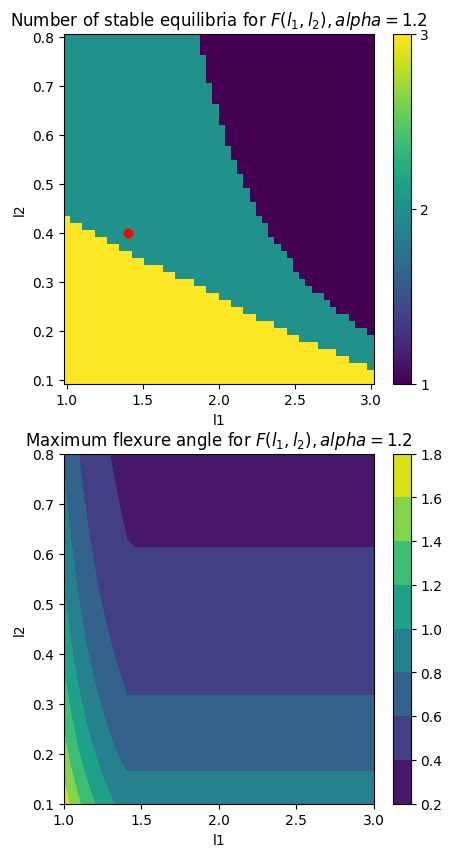

In [153]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
l1 = 1.4
l2 = 0.4
print(h2)
ax1.pcolormesh(l1s, l2s, rootsmesh, cmap='viridis')
ax1.set_xlabel('l1')
ax1.set_ylabel('l2')
#add colorbar with discrete values

cbar = fig.colorbar(ax1.pcolormesh(l1s, l2s, rootsmesh, cmap='viridis'), ax=ax1, ticks=[1,2,3,4])
cbar.ax.set_yticklabels(['1', '2', '3', '4'])
ax1.scatter(l1, l2, color='red')
#add title in latex number of roots
title = f'Number of stable equilibria for $F(l_1,l_2), alpha ={alpha} $'
#add subplot title
ax1.title.set_text(title)



#plot max angle
#clear previous plot


ax2.contourf(l1s, l2s, maxangmesh, cmap='viridis')
ax2.set_xlabel('l1')
ax2.set_ylabel('l2')
#add colorbar

cbar = fig.colorbar(ax2.contourf(l1s, l2s, maxangmesh, cmap='viridis'), ax=ax2)
title = f'Maximum flexure angle for $F(l_1,l_2), alpha ={alpha} $'
ax2.title.set_text(title)
plt.show()

Text(0.5, 1.0, 'Maximum angle for $F(l_1,l_2), alpha =1.3 $')

<Figure size 640x480 with 0 Axes>

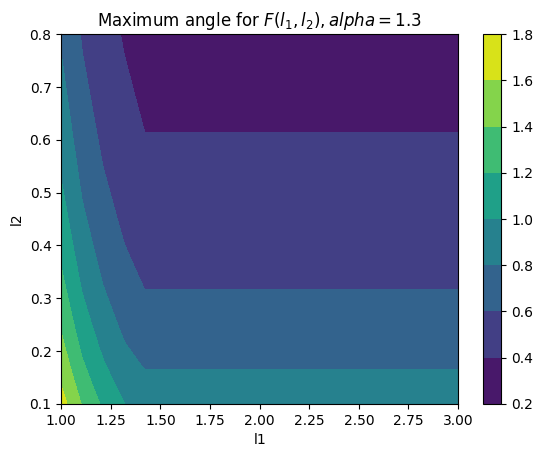

In [111]:
#plot max angle
#clear previous plot
plt.clf()
fig, ax = plt.subplots()

ax.contourf(l1s, l2s, maxangmesh, cmap='viridis')
ax.set_xlabel('l1')
ax.set_ylabel('l2')
#add colorbar

cbar = fig.colorbar(ax.contourf(l1s, l2s, maxangmesh, cmap='viridis'), ax=ax)
title = f'Maximum angle for $F(l_1,l_2), alpha ={alpha} $'
plt.title(title)
